In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
## Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])

In [3]:
## Filter out movie population of interest and remove nulls
## keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])
df.head(3)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [11]:
## Slice out data and calc stats
data = df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)

In [4]:
#Create the simulated population
#choose values between 1-1000, choose 5000 values
np.random.seed(42)
uniform = np.random.uniform(1, 1000, 5000)

In [5]:
uniform

array([375.16557873, 950.7635921 , 732.26194787, ..., 328.51499505,
       815.92963525, 597.71506595])

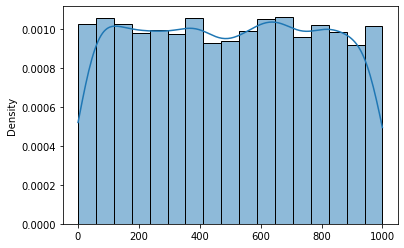

In [6]:
#Visualize the population
## Let's graph the density plot
sns.histplot(x=uniform,stat='density', kde=True);

In [7]:
#Create the list of sample means
## loop to take 1000 samples of 30 and calculate the means of each sample
np.random.seed(42)
sample_means = []
for i in range(1000):    
  sample = np.random.choice(uniform,size=30,replace=False)    
  sample_means.append( np.mean(sample))
# Print the first 5 sample means
sample_means[0:5]

[369.4808932208104,
 555.6072958462468,
 507.2136853427085,
 449.9927701766231,
 530.2748285204503]

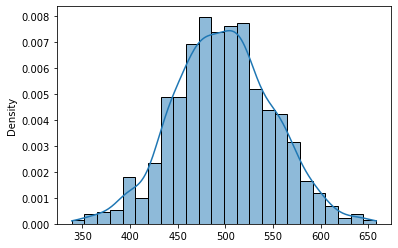

In [8]:
#Plot the sample means
# visualize the sample means
sns.histplot(sample_means,kde=True,stat='density');

Wow! When we plot the distribution of sample means, it appears that we may have a normal distribution! Let's confirm with the test for normality.

In [9]:
#Test for Normality
stats.normaltest(sample_means)

NormaltestResult(statistic=0.14786790715227197, pvalue=0.9287330313111472)

- Our p-value is greater than 0.05 so we accept the null hypothesis that yes, indeed, our distribution of sample means is normal! 

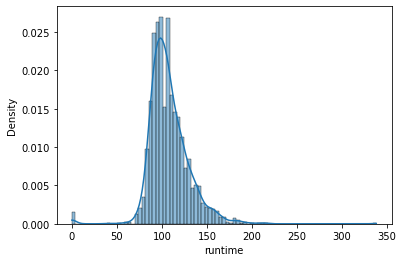

In [12]:
#Visualize the population of Df
sns.histplot(x=data, kde=True, stat='density');

In [13]:
#Test for normality
#We have previously tested this distribution for normality, but let's reconfirm here:
stats.normaltest(data)

NormaltestResult(statistic=498.6206359702571, pvalue=5.319914071356255e-109)

The p-value is less than 0.05 which means we reject the null hypothesis, and our data is NOT normal.

In [14]:
#Create the list of sample means
## loop to take 1000 samples of 30 and calculate the mean of each sample
np.random.seed(42)
sample_means = []
for i in range(1000):   
  sample = np.random.choice(data,size=30,replace=False)    
  sample_means.append( np.mean(sample))
sample_means[0:5]

[109.33333333333333, 107.8, 109.43333333333334, 106.46666666666667, 110.9]

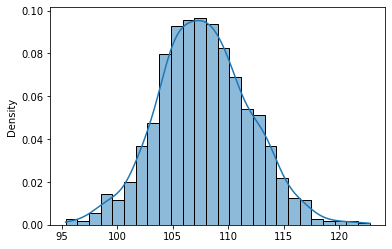

In [15]:
#Plot the sample means
sns.histplot(sample_means,kde=True,stat='density');

In [16]:
#Test for Normality
stats.normaltest(sample_means)

NormaltestResult(statistic=4.216509433391504, pvalue=0.12144974578576584)

The p-value is greater than 0.5 which means that we accept the null hypothesis and conclude that our sample means distribution is normally distributed!